<a href="https://colab.research.google.com/github/Parag0506/Flood-Forecasting/blob/main/Flood_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#This Machine Learning Model uses 5 Machine Learning Algorithms namely KNN Classification, Logistic Regression[LR], Support 
# Vector[SVM], Decision Tree[DT] and Random Forest[RF] to get the best possible model to predict the floods using Kerela Rainfall Data.

In [7]:
cd Flood-Prediction-Model

/content/Flood-Prediction-Model


In [8]:
# Ignoring Warnings.
import warnings
warnings.filterwarnings('ignore')

In [10]:
import os

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('kerala.csv')
print(data)

    SUBDIVISION  YEAR   JAN   FEB  ...    NOV    DEC   ANNUAL RAINFALL  FLOODS
0        KERALA  1901  28.7  44.7  ...  350.8   48.4            3248.6     YES
1        KERALA  1902   6.7   2.6  ...  158.3  121.5            3326.6     YES
2        KERALA  1903   3.2  18.6  ...  157.0   59.0            3271.2     YES
3        KERALA  1904  23.7   3.0  ...   33.9    3.3            3129.7     YES
4        KERALA  1905   1.2  22.3  ...   74.4    0.2            2741.6      NO
..          ...   ...   ...   ...  ...    ...    ...               ...     ...
113      KERALA  2014   4.6  10.3  ...   99.5   47.2            3046.4     YES
114      KERALA  2015   3.1   5.8  ...  223.6   79.4            2600.6      NO
115      KERALA  2016   2.4   3.8  ...  125.4   23.6            2176.6      NO
116     KERALA   2017   1.9   6.8  ...   92.5   38.1            2117.1      NO
117      KERALA  2018  29.1  52.1  ...  125.4   65.1            4473.0     YES

[118 rows x 16 columns]


In [12]:
data.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [13]:
data.tail()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [14]:
data.isnull().sum()  # cheaking if any colomns is left empty or not.


SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [15]:
print(data.shape)


(118, 16)


In [16]:
data.describe()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [17]:
data.info


<bound method DataFrame.info of     SUBDIVISION  YEAR   JAN   FEB  ...    NOV    DEC   ANNUAL RAINFALL  FLOODS
0        KERALA  1901  28.7  44.7  ...  350.8   48.4            3248.6     YES
1        KERALA  1902   6.7   2.6  ...  158.3  121.5            3326.6     YES
2        KERALA  1903   3.2  18.6  ...  157.0   59.0            3271.2     YES
3        KERALA  1904  23.7   3.0  ...   33.9    3.3            3129.7     YES
4        KERALA  1905   1.2  22.3  ...   74.4    0.2            2741.6      NO
..          ...   ...   ...   ...  ...    ...    ...               ...     ...
113      KERALA  2014   4.6  10.3  ...   99.5   47.2            3046.4     YES
114      KERALA  2015   3.1   5.8  ...  223.6   79.4            2600.6      NO
115      KERALA  2016   2.4   3.8  ...  125.4   23.6            2176.6      NO
116     KERALA   2017   1.9   6.8  ...   92.5   38.1            2117.1      NO
117      KERALA  2018  29.1  52.1  ...  125.4   65.1            4473.0     YES

[118 rows x 16 colu

In [18]:
data.cov()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444
JAN,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092
FEB,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330
MAR,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793
APR,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185
MAY,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795
JUN,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986
JUL,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520
AUG,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721
SEP,448.915812,-214.094844,132.629654,527.184758,70.336859,2101.892304,-1194.576633,5846.347194,2178.762799,14859.885839,-369.500828,-280.077350,-49.210243,23610.285602


In [19]:
data.corr()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [20]:
# replacing the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [21]:

#Printing the clean data
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [22]:
# Seperating the data which we are gonna use for prediction.
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [23]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

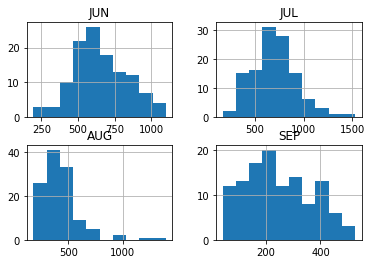

In [24]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()
# How the rainfall index vary during rainy season

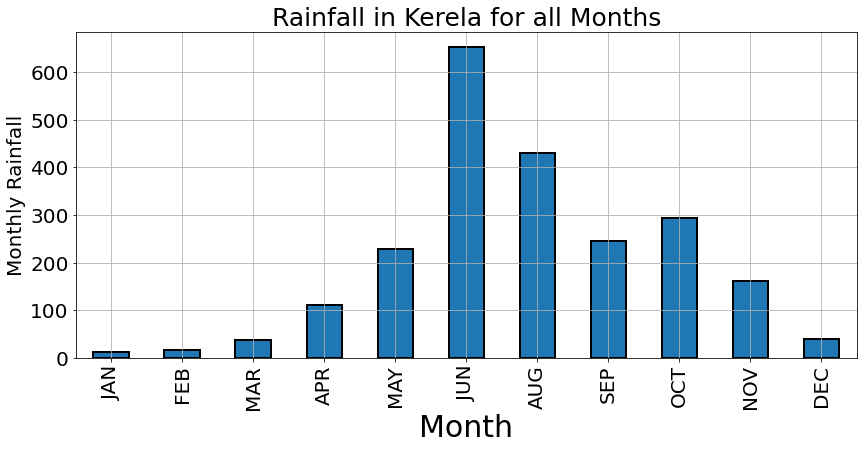

In [25]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerela for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

In [26]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [27]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
68,1969,2.7,6.4,19.4,117.2,227.4,550.5,818.8,284.8,216.4,235.6,119.4,66.3
75,1976,0.1,1.5,21.0,134.5,75.8,196.8,641.5,342.6,116.2,221.3,286.7,30.8
112,2013,3.9,40.1,49.9,49.3,119.3,1042.7,830.2,369.7,318.6,259.9,154.9,17.0
50,1951,6.6,6.5,41.6,175.9,148.5,774.1,544.6,190.6,313.8,250.6,229.6,23.2
98,1999,1.8,23.8,21.4,111.6,453.2,607.3,700.4,266.3,88.0,567.9,68.1,4.9


In [28]:
x_train.dtypes


YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [29]:
x_test.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
107,2008,0.8,30.3,217.2,108.4,81.2,469.9,505.1,349.0,347.0,343.4,55.4,17.0
111,2012,7.4,11.0,21.0,171.1,95.3,430.3,362.6,501.6,241.1,187.5,112.9,9.4
46,1947,22.2,27.3,98.0,142.2,85.7,556.1,669.3,739.6,394.5,183.7,32.4,47.0
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1
73,1974,1.6,5.4,16.0,128.0,221.5,266.9,1004.2,533.6,383.6,142.1,61.0,3.6


In [30]:
# type casting.
y_train=y_train.astype('int')
y_train

68     0
75     0
112    1
50     0
98     0
      ..
35     1
93     1
33     0
0      1
104    1
Name: FLOODS, Length: 94, dtype: int64

In [31]:
y_test=y_test.astype('int')
y_test

107    0
111    0
46     1
116    0
73     0
109    1
62     0
85     0
24     1
29     1
90     1
39     1
49     1
38     1
40     1
56     1
7      0
15     1
67     1
105    1
65     0
72     0
83     0
95     0
Name: FLOODS, dtype: int64

In [32]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0])

In [34]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
107    0
111    0
46     1
116    0
73     0
109    1
62     0
85     0
24     1
29     1
90     1
39     1
49     1
38     1
40     1
56     1
7      0
15     1
67     1
105    1
65     0
72     0
83     0
95     0
Name: FLOODS, dtype: int64


In [35]:

print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0]


In [36]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [37]:
knn_acc

array([0.78125   , 0.64516129, 0.70967742])

In [38]:
knn_proba


array([[1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2,

In [39]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:83.333333
Recall Score:69.230769
ROC score:84.615385
[[11  0]
 [ 4  9]]


In [41]:
#Logistic Regression
x_train_std=minmax.fit_transform(x_train)         # fit the values in between 0 and 1.
y_train_std=minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

In [42]:
lr_acc

array([0.75      , 0.77419355, 0.87096774])

In [43]:
lr_proba


array([[0.63990608, 0.36009392],
       [0.78911011, 0.21088989],
       [0.48660749, 0.51339251],
       [0.42127158, 0.57872842],
       [0.74349067, 0.25650933],
       [0.46566581, 0.53433419],
       [0.692913  , 0.307087  ],
       [0.38909153, 0.61090847],
       [0.79434233, 0.20565767],
       [0.22931331, 0.77068669],
       [0.64632495, 0.35367505],
       [0.44254531, 0.55745469],
       [0.62965264, 0.37034736],
       [0.25974655, 0.74025345],
       [0.66558896, 0.33441104],
       [0.46936314, 0.53063686],
       [0.56371588, 0.43628412],
       [0.37939939, 0.62060061],
       [0.7784847 , 0.2215153 ],
       [0.38592362, 0.61407638],
       [0.42846499, 0.57153501],
       [0.49288837, 0.50711163],
       [0.58063231, 0.41936769],
       [0.59484219, 0.40515781],
       [0.61320456, 0.38679544],
       [0.85451813, 0.14548187],
       [0.71399301, 0.28600699],
       [0.6994612 , 0.3005388 ],
       [0.26108662, 0.73891338],
       [0.66911169, 0.33088831],
       [0.

In [44]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0])

In [45]:
print(y_test.values)


[0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0]


In [46]:

print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0]


In [47]:

from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:100.000000
recall score:100.000000
roc score:100.000000
[[11  0]
 [ 0 13]]


In [48]:
#Support Vector Classification to predict
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [49]:
svc_acc


array([0.8125    , 0.74193548, 0.80645161])

In [50]:
svc_proba


array([[9.45849731e-01, 5.41502687e-02],
       [9.81656325e-01, 1.83436752e-02],
       [2.15797082e-01, 7.84202918e-01],
       [3.64414398e-01, 6.35585602e-01],
       [7.51485605e-01, 2.48514395e-01],
       [1.67404947e-01, 8.32595053e-01],
       [9.58402001e-01, 4.15979991e-02],
       [2.01691118e-01, 7.98308882e-01],
       [9.59393548e-01, 4.06064521e-02],
       [1.88876180e-02, 9.81112382e-01],
       [7.91418745e-01, 2.08581255e-01],
       [1.96127243e-01, 8.03872757e-01],
       [3.39532523e-01, 6.60467477e-01],
       [1.27516275e-01, 8.72483725e-01],
       [8.39694909e-01, 1.60305091e-01],
       [2.01913940e-01, 7.98086060e-01],
       [7.25163975e-01, 2.74836025e-01],
       [1.16738119e-01, 8.83261881e-01],
       [9.80621668e-01, 1.93783322e-02],
       [1.90211235e-01, 8.09788765e-01],
       [4.50947431e-01, 5.49052569e-01],
       [1.98292878e-01, 8.01707122e-01],
       [7.51823900e-01, 2.48176100e-01],
       [5.80430577e-01, 4.19569423e-01],
       [8.623892

In [51]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.05415027, 0.01834368, 0.78420292, 0.6355856 , 0.24851439,
       0.83259505, 0.041598  , 0.79830888, 0.04060645, 0.98111238,
       0.20858125, 0.80387276, 0.66046748, 0.87248373, 0.16030509,
       0.79808606, 0.27483602, 0.88326188, 0.01937833, 0.80978876,
       0.54905257, 0.80170712, 0.2481761 , 0.41956942, 0.13761071,
       0.07892846, 0.10931092, 0.10833026, 0.8864569 , 0.24631743,
       0.99301116, 0.94395244, 0.40420692, 0.83304838, 0.63836645,
       0.3637142 , 0.07404749, 0.93944453, 0.0278402 , 0.74071307,
       0.16724218, 0.38075462, 0.63454186, 0.57416995, 0.01655879,
       0.6190063 , 0.80646806, 0.10763002, 0.55062154, 0.02089568,
       0.09403606, 0.84614012, 0.98737336, 0.64923474, 0.54594076,
       0.89628826, 0.45245053, 0.77320562, 0.29288203, 0.86561311,
       0.23600887, 0.00150691, 0.88722263, 0.92121267, 0.5445765 ,
       0.03303441, 0.61039918, 0.02306238, 0.09038006, 0.61826845,
       0.98390413, 0.99998502, 0.66540345, 0.96013301, 0.75183

In [52]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0]


In [53]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0]


In [54]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:79.166667
recall score:69.230769
roc score:80.069930
[[10  1]
 [ 4  9]]


In [55]:
# Decision Tree Classification to Predict
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc


array([0.625     , 0.61290323, 0.74193548])

In [56]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1])

In [57]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0]


In [58]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:58.333333
recall score:46.153846
roc score:59.440559
[[8 3]
 [7 6]]


In [59]:
# Random Forest Classifier to predict
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [61]:
rmf_clf_acc


array([0.78125   , 0.74193548, 0.83870968])

In [62]:
rmf_proba


array([[0.5908773 , 0.4091227 ],
       [0.69616748, 0.30383252],
       [0.42068249, 0.57931751],
       [0.4644331 , 0.5355669 ],
       [0.62019508, 0.37980492],
       [0.51357693, 0.48642307],
       [0.5613458 , 0.4386542 ],
       [0.36297146, 0.63702854],
       [0.79957655, 0.20042345],
       [0.28387813, 0.71612187],
       [0.78973955, 0.21026045],
       [0.41206013, 0.58793987],
       [0.45273853, 0.54726147],
       [0.45117125, 0.54882875],
       [0.5849504 , 0.4150496 ],
       [0.49608198, 0.50391802],
       [0.518896  , 0.481104  ],
       [0.25796498, 0.74203502],
       [0.69332163, 0.30667837],
       [0.54956563, 0.45043437],
       [0.44776783, 0.55223217],
       [0.59437879, 0.40562121],
       [0.60841475, 0.39158525],
       [0.4518778 , 0.5481222 ],
       [0.5616876 , 0.4383124 ],
       [0.82585913, 0.17414087],
       [0.62920946, 0.37079054],
       [0.76498587, 0.23501413],
       [0.42946831, 0.57053169],
       [0.5338104 , 0.4661896 ],
       [0.

In [63]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:58.333333
recall score:46.153846
roc score:59.440559
[[8 3]
 [7 6]]


In [64]:
# Comparing all the prediction models
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

,Name,Score
0,KNN,0.833333
1,LR,1.000000
2,SVC,0.791667
3,DT,0.500000
4,RF,0.708333


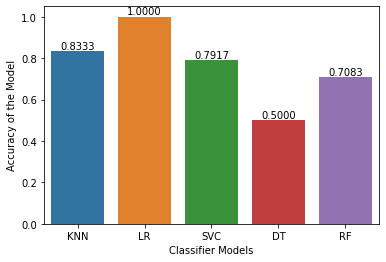

In [65]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [66]:
tr_split['Score'].max()


1.0